# **Лабораторная забота №2.**  

## **Статистическое  моделирование  случайных  величин. Интервальное  оценивание  параметров  распределения случайных величин.** 

## **Часть I**

## **Вариант 8**

### 1.  Смоделировать  выборку из   п  независимых наблюдений  над случайной  величиной  X, имеющей нормальный закон распределения с параметрами (a, σ^2).

In [36]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as st
import seaborn as sns
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import norm, skew, kurtosis

In [37]:
n = 14
a = -0.5
sigma = np.sqrt(4)
gamma = 0.95

In [38]:
x = np.random.normal(a, sigma, size=n)

### 1.1.  С надежностью γ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что  дисперсия случайной величины X известна

In [39]:
P_= 1 / 2 + gamma / 2
t_gamma = st.norm.ppf(P_, loc=0, scale=1)
a_left_ = x.mean() - sigma * t_gamma / n **0.5
a_right_= x.mean() + sigma * t_gamma / n**0.5
print('Доверительный интервал для параметра a:')
print(a_left_,a_right_) 

Доверительный интервал для параметра a:
-2.193915709489282 -0.09862607504208731


In [40]:
a_estimate = np.mean(x)
interval_estimate_1 = st.norm.interval(confidence=gamma, 
              loc=a_estimate,
              scale=sigma/np.sqrt(n)) 
print('Доверительный интервал для параметра a:')
print(interval_estimate_1)

Доверительный интервал для параметра a:
(-2.193915709489282, -0.09862607504208731)


### 1.2. С надежностью  найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна.

In [41]:
interval_for_MX_ = [0]*2 
t_gamma_0 = st.t.ppf(1/2+gamma/2, df=len(x)-1) 
a_estimate = np.mean(x)
sigma_estimate = np.std(x, ddof=1)
interval_for_MX_[0] = a_estimate - sigma_estimate * t_gamma_0 / np.sqrt(n)
interval_for_MX_[1] = a_estimate + sigma_estimate * t_gamma_0 / np.sqrt(n)
print(interval_for_MX_)

[-2.262726644228465, -0.029815140302903886]


In [42]:
a_estimate=np.mean(x)
sigma_estimate=np.std(x, ddof=1)
interval_estimate_2=st.t.interval(gamma, df=len(x)-1,
              loc=a_estimate,
              scale=sigma_estimate/np.sqrt(n)) 
print(interval_estimate_2) 

(-2.262726644228465, -0.029815140302903886)


### 1.3. С надежностью γ найти интервальную оценку (доверительный интервал) для дисперсии случайной величины X

In [43]:
variance = np.var(x, ddof=1)
alpha = 1 - gamma
chi2_lower = st.chi2.ppf(alpha / 2, n - 1)
chi2_upper = st.chi2.ppf(1 - alpha / 2, n - 1)
interval_lower = (n - 1) * variance / chi2_upper
interval_upper = (n - 1) * variance / chi2_lower

print(variance) 
print(interval_lower, interval_upper)

3.73899884748686
1.965061507225951 9.704413286850054


In [44]:
ci_lower, ci_upper = st.chi2.interval(gamma, n - 1)
interval_lower = (n - 1) * variance / ci_upper
interval_upper = (n - 1) * variance / ci_lower

print(interval_lower, interval_upper)

1.965061507225951 9.704413286850054


### 2. Построить график зависимости длины доверительного интервала от надежности при неизменном объеме выборки для случаев интервального оценивания  математического ожидания и дисперсии. 

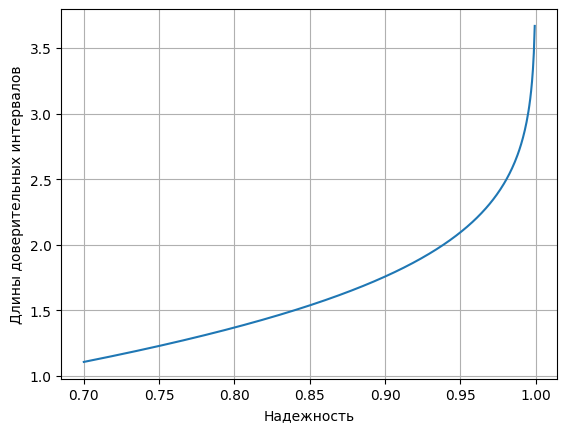

In [45]:
sample = np.random.normal(a, sigma, n)
a_estimate = np.mean(sample) 
V = 500
gamma_ = [0.0] * V 
delta_ = [0.0] * V
gamma__0 = 0.7
gamma__1 = 0.9999999999
h = (gamma__1 - gamma__0) / V
for i in range(V):
    gamma_[i] = gamma__0 + i * h
    interval_estimate_MX=st.norm.interval(confidence=gamma_[i], 
              loc=a_estimate, 
              scale=sigma/np.sqrt(n)) 
    delta_[i] = interval_estimate_MX[1] - interval_estimate_MX[0] 
plt.plot(gamma_,delta_)
plt.xlabel("Надежность")
plt.ylabel("Длины доверительных интервалов")
plt.grid()

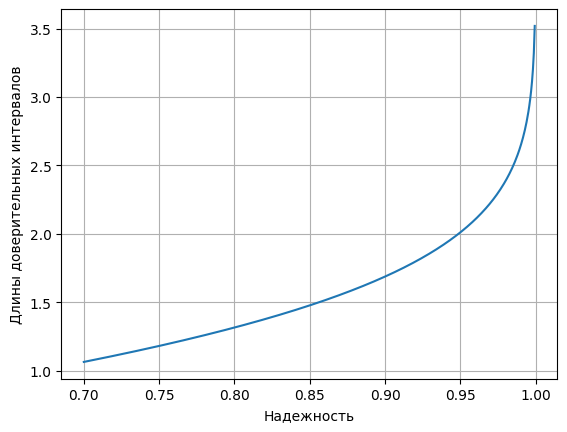

In [46]:
sample = np.random.normal(a, sigma, n)
a_estimate = np.mean(sample) 
V = 500
gamma_ = [0.0] * V 
delta_ = [0.0] * V
gamma__0 = 0.7
gamma__1 = 0.9999999999
h = (gamma__1 - gamma__0) / V
for i in range(V):
    gamma_[i] = gamma__0 + i * h
    interval_estimate_MX=st.norm.interval(confidence=gamma_[i], 
              loc=a_estimate, 
              scale=np.std(sample, ddof=1)/np.sqrt(n)) 
    delta_[i] = interval_estimate_MX[1] - interval_estimate_MX[0] 
plt.plot(gamma_,delta_)
plt.xlabel("Надежность")
plt.ylabel("Длины доверительных интервалов")
plt.grid()

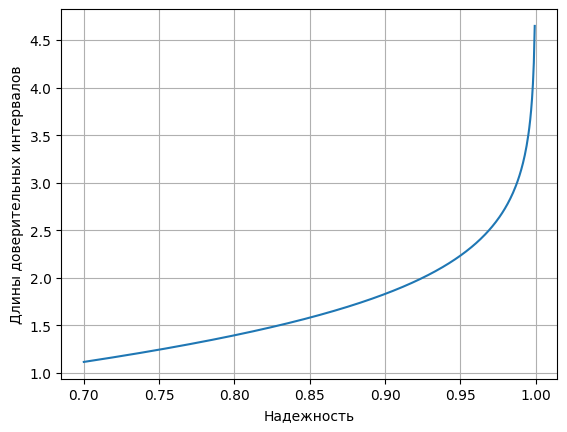

In [47]:
V = 500
gamma_ = [0.0] * V 
delta_ = [0.0] * V
gamma__0 = 0.7
gamma__1 = 0.9999999999
h = (gamma__1 - gamma__0) / V 
for i in range(V):
    gamma_[i] = gamma__0 + i * h
    a_estimate=np.mean(x)
    sigma_estimate=np.std(x, ddof=1)
    interval_estimate_2=st.t.interval(gamma_[i], df=len(x)-1,
              loc=a_estimate,
              scale=sigma_estimate/np.sqrt(n)) 
    delta_[i] = interval_estimate_2[1] - interval_estimate_2[0]
plt.plot(gamma_, delta_)
plt.xlabel("Надежность")
plt.ylabel("Длины доверительных интервалов")
plt.grid()

### 3. Построить график зависимости длины доверительного интервала от объема выборки при неизменной надежности для случаев интервального оценивания математического ожидания и дисперсии.

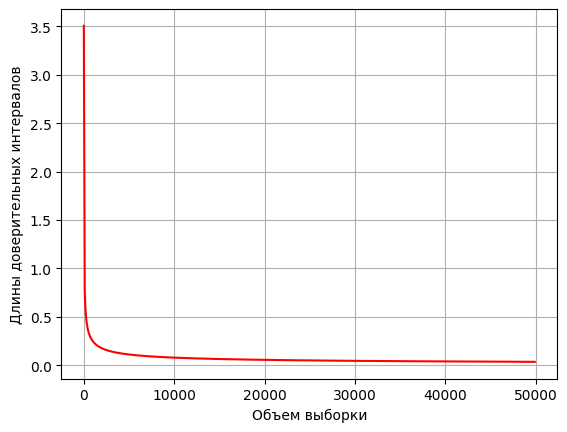

In [48]:
sample = np.random.normal(a, sigma, n)
a_estimate=np.mean(sample)
V=500
n_=[0.0]*V
delta_=[0.0]*V
n__0=5
n__1=50000
h=(n__1-n__0)/V
for i in range(V):
    n_[i]=n__0+i*h
    interval_estimate_MX=st.norm.interval(gamma, 
              loc=a_estimate, 
              scale=sigma/np.sqrt(n_[i])) 
    delta_[i]=interval_estimate_MX[1]-interval_estimate_MX[0]
plt.xlabel("Объем выборки")
plt.ylabel("Длины доверительных интервалов")
plt.plot(n_,delta_, color='red')
plt.grid()

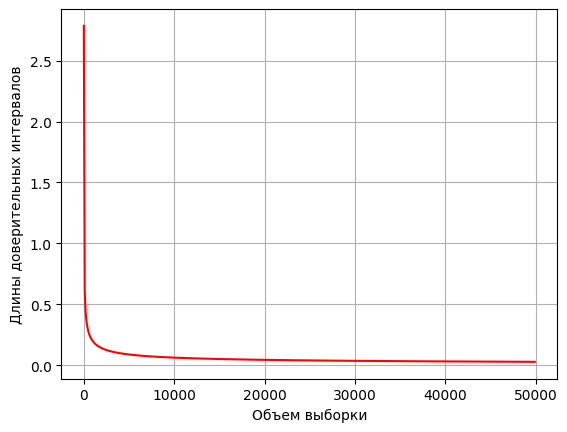

In [49]:
sample = np.random.normal(a, sigma, n)
a_estimate=np.mean(sample)
V=500
n_=[0.0]*V
delta_=[0.0]*V
n__0=5
n__1=50000
h=(n__1-n__0)/V
for i in range(V):
    n_[i]=n__0+i*h
    interval_estimate_MX=st.norm.interval(gamma, 
              loc=a_estimate, 
              scale=np.std(sample, ddof=1)/np.sqrt(n_[i])) 
    delta_[i]=interval_estimate_MX[1]-interval_estimate_MX[0]
plt.xlabel("Объем выборки")
plt.ylabel("Длины доверительных интервалов")
plt.plot(n_,delta_, color='red')
plt.grid()

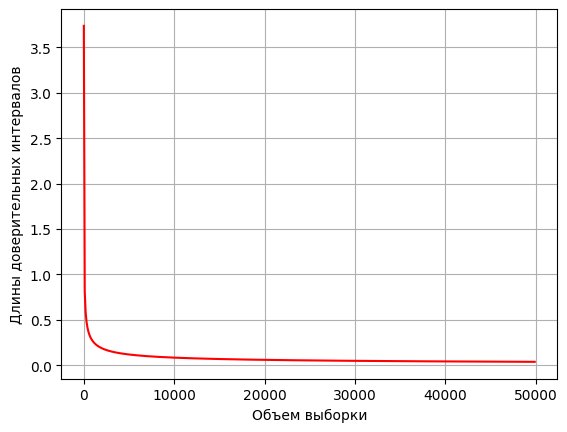

In [50]:
sample = np.random.normal(a, sigma, n)
a_estimate=np.mean(sample)
V=500
n_=[0.0]*V
delta_=[0.0]*V
n__0=5
n__1=50000
h=(n__1-n__0)/V
for i in range(V):
    n_[i] = n__0 + i*h
    a_estimate = np.mean(x)
    sigma_estimate = np.std(x, ddof=1)
    interval_estimate_2 = st.t.interval(gamma, df=len(x)-1,
              loc=a_estimate,
              scale=sigma_estimate/np.sqrt(n_[i])) 
    delta_[i]=interval_estimate_2[1] - interval_estimate_2[0]
plt.xlabel("Объем выборки")
plt.ylabel("Длины доверительных интервалов")
plt.plot(n_, delta_, color='red')
plt.grid()

### 4. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,σ2). По каждой из M выборок с надежностью γ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна.

In [51]:
M=1800 
a = -0.5
sigma = 2

count = 0
confidence_intervals = []
for i in range(M):
    X = np.random.normal(a, sigma, size=n)
    sigma_estimate=np.std(X,ddof=1)
    interval_estimate_2=st.t.interval(confidence=gamma, df=len(X)-1,
              loc=np.mean(X),
              scale=sigma_estimate/np.sqrt(n))
    confidence_intervals.append((interval_estimate_2[0], interval_estimate_2[1]))
    if interval_estimate_2[0] <= a <= interval_estimate_2[1]:
        count += 1
gamma_star = count / M
print(f"Точечная оценка надежности: gamma* = {gamma_star:.4f}")
print(f"Доверительные интервалы для каждой из М выборок: {confidence_intervals}" )

Точечная оценка надежности: gamma* = 0.9506
Доверительные интервалы для каждой из М выборок: [(-2.2714887453174284, 0.4071103387567482), (-2.161579056448752, 0.4418918135656382), (-2.465147502590642, 0.4781304096508121), (-1.316377751697986, 0.41336137617153873), (-1.5786026605155015, 0.7329741662712218), (-2.16069026647257, 0.4875738017727417), (-0.7810114818162835, 0.6819174964666751), (-2.10176161619363, 0.13587904307587506), (-1.9082999951853985, 0.10532171792764045), (-1.8888881394560653, 0.9424666575473692), (-0.24758755629438856, 1.5348973097258303), (-2.304003338769699, 0.40947626894359535), (-2.1576444036635087, -0.25210452059395827), (-1.433146686836222, -0.2930435330806036), (-2.8789984538228888, 0.4376166845639464), (-2.264407710843992, -0.08529906083435068), (-2.0431583382172667, 0.21340320768024668), (-1.4801655307444919, -0.4661174829898831), (-2.528489599513943, -0.586805432493108), (-1.6996503509448138, 0.49588620057729293), (-1.0004416813431283, 1.5515349604837103), (

### 5. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,σ2).

### 5.1. По каждой из M выборок найти наблюдаемое значение случайной величины Z (описание случайной величины Z приведено в Вашем варианте)

In [52]:
M = 1800
n = 14
a = -0.5
sigma = 2
z_values = []
for _ in range(M):
    X = np.random.normal(a, sigma, size =n)
    x_bar = np.mean(X)
    S2 = np.std(X, ddof=1) 
    Z = ((x_bar - a) / S2) * np.sqrt(n)
    z_values.append(Z)
# z_values = np.array(z_values)
print("Наблюдаемые значения:")
print(z_values)

Наблюдаемые значения:
[-0.2771355177155615, 0.5771533439144253, 0.5783008407004255, -1.2627840687691971, 0.36592222063184204, 0.13072326936841808, -1.6857066053301235, -0.3625648687593013, -1.4216524330607538, 1.5226388203329733, 0.1459682094831982, 0.5458242303795218, -2.7776837110844674, 0.28058118425424844, 2.491863075843223, -0.2909655805487622, -0.15335713329188277, 0.4935884929179137, -0.2546920454553399, -0.8750162822156768, -1.6930627168989547, -1.2864950333656207, -0.21269905549097054, 0.1582994771693558, -0.7297645602686684, 2.7036102561490143, -1.500336830896069, 0.7372470096221344, 0.032691294575004845, 0.33079014301689225, -1.667104672649939, 0.6974878063771323, 1.7852599622528764, -0.399423343182038, -0.24915251957933163, 0.3211720647465212, 1.486154711703758, -0.7200948027723112, 0.5585395994853828, -1.0510100263397597, -0.07679076839017843, 0.7961762988556316, -0.19275668767391388, 0.17762903213713524, 0.642519597505743, -1.2054756377418556, 2.2970563939791213, 1.111292

### 5.2. По выборке из M значений случайной величины Z найти выборочные числовые характеристики ее распределения.

In [53]:
mean_z = np.mean(z_values)
median_z = np.median(z_values)
var_z = np.var(z_values)
std_z = np.std(z_values)
skew_z = skew(z_values)
kurtosis_z = kurtosis(z_values)

print("Характеристики:")
print(f"Математическое ожидание: {mean_z}")
print(f"Медиана: {median_z}")
print(f"Дисперсия: {var_z}")
print(f"Стандартное отклонение:{std_z}")
print(f"Асимметрия: {skew_z}")
print(f"Эксцесс: {kurtosis_z}")


Характеристики:
Математическое ожидание: 0.024281977685188156
Медиана: 0.033883964710407596
Дисперсия: 1.1882807393049881
Стандартное отклонение:1.0900829047852223
Асимметрия: 0.0783296273194253
Эксцесс: 0.29506500126047897


### 5.3. Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины Z, а также ящичковую диаграмму.

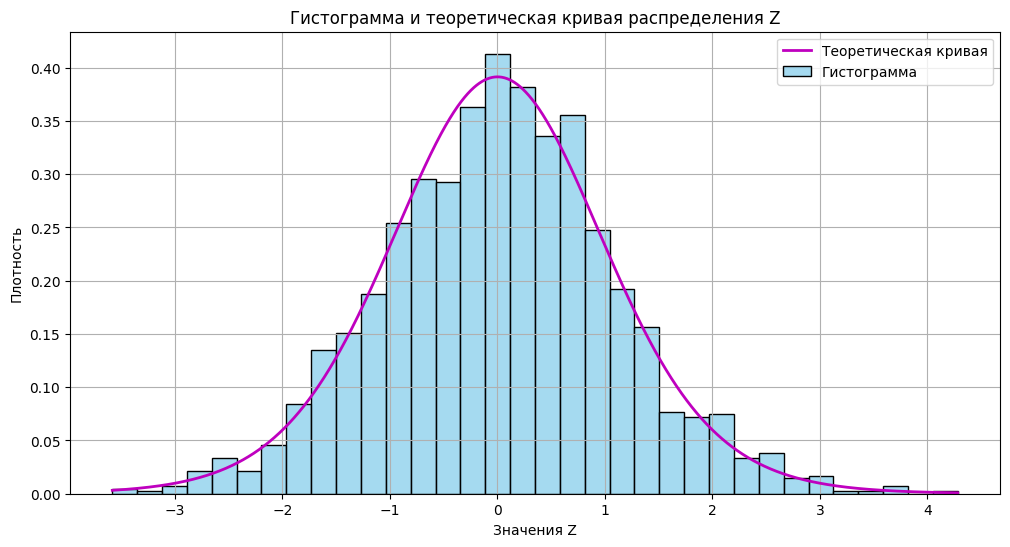

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(z_values, bins='fd', kde=False, stat='density', color='skyblue', label='Гистограмма')

y = np.linspace(min(z_values), max(z_values), 1000000)
p = st.t.pdf(y, n - 1)
# p = norm.pdf(y, np.mean(z_values), np.std(z_values))
plt.plot(y, p, 'm', linewidth=2, label='Теоретическая кривая')

plt.title('Гистограмма и теоретическая кривая распределения Z')
plt.xlabel('Значения Z')
plt.ylabel('Плотность')
plt.legend()
plt.grid()

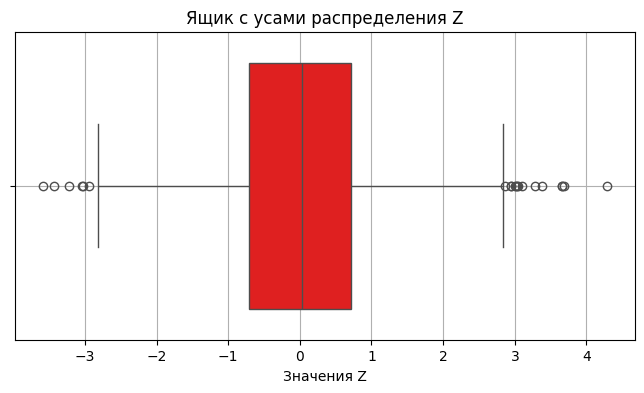

In [55]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=z_values, color="red")
plt.title('Ящик с усами распределения Z')
plt.xlabel('Значения Z')
plt.grid()

q1 = np.percentile(z_values, 25)
q3 = np.percentile(z_values, 75)

IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

# Распределение t-Стьюдента

## **Часть II**

### 1. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,sigma2). По каждой из M выборок с надежностью gamma найти интервальную оценку (доверительный интервал) для дисперсии случайной величины X. 

In [56]:
M = 1800
n = 14
a = -0.5
sigma = 2
sigma2 = 4
t_gamma = 2.50
count_in_interval = 0
alpha = 1 - gamma
chi2_lower = chi2.ppf(alpha / 2, df=n-1)
chi2_upper = chi2.ppf(1 - alpha / 2, df=n-1)
for i in range(M):
    X = np.random.normal(a, sigma, size =n)  
    S2 = np.var(X, ddof=1)   
    lower_bound = (n - 1) * S2 / chi2_upper
    upper_bound = (n - 1) * S2 / chi2_lower 
    confidence_intervals.append((lower_bound, upper_bound))
    if lower_bound <= sigma2 <= upper_bound:
            count_in_interval += 1
gamma_star = count_in_interval / M

print(f"Оценка надежности gamma*: {gamma_star}")
print(f"Исходная надежность gamma: {gamma}")
print(f"Доверительные интервалы для каждой из М выборок: {confidence_intervals}" )
print(f"Отклонение: {abs(gamma_star - gamma)}")

Оценка надежности gamma*: 0.9494444444444444
Исходная надежность gamma: 0.95
Доверительные интервалы для каждой из М выборок: [(-2.2714887453174284, 0.4071103387567482), (-2.161579056448752, 0.4418918135656382), (-2.465147502590642, 0.4781304096508121), (-1.316377751697986, 0.41336137617153873), (-1.5786026605155015, 0.7329741662712218), (-2.16069026647257, 0.4875738017727417), (-0.7810114818162835, 0.6819174964666751), (-2.10176161619363, 0.13587904307587506), (-1.9082999951853985, 0.10532171792764045), (-1.8888881394560653, 0.9424666575473692), (-0.24758755629438856, 1.5348973097258303), (-2.304003338769699, 0.40947626894359535), (-2.1576444036635087, -0.25210452059395827), (-1.433146686836222, -0.2930435330806036), (-2.8789984538228888, 0.4376166845639464), (-2.264407710843992, -0.08529906083435068), (-2.0431583382172667, 0.21340320768024668), (-1.4801655307444919, -0.4661174829898831), (-2.528489599513943, -0.586805432493108), (-1.6996503509448138, 0.49588620057729293), (-1.0004416

In [57]:
M = 1800
n = 14
a = -0.5
sigma = 2 
K = 500
sigma2 = 4 
count_in_interval = 0
gamma_values = []
alpha = 1 - gamma
chi2_lower = chi2.ppf(alpha / 2, df=n-1)
chi2_upper = chi2.ppf(1 - alpha / 2, df=n-1)
for _ in range (K):
    for i in range(M):
        X = np.random.normal(a, sigma, size =n)  
        S2 = np.var(X, ddof=1)   
        lower_bound = (n - 1) * S2 / chi2_upper
        upper_bound = (n - 1) * S2 / chi2_lower 
        confidence_intervals.append((lower_bound, upper_bound))
        # if lower_bound <= sigma <= upper_bound:
        #         count_in_interval += 1
        gamma_star = lower_bound
    gamma_values.append(gamma_star)

gamma_star_values = np.array(gamma_values)

mean_gamma_star = np.mean(gamma_star_values)
var_gamma_star = np.var(gamma_star_values)
std_gamma_star = np.std(gamma_star_values)

print(f"Выборочное среднее оценки gamma*: {mean_gamma_star}")
print(f"Выборочная дисперсия оценки gamma*: {var_gamma_star}")
print(f"Выборочное стандартное отклонение оценки gamma*: {std_gamma_star}")
print(f"Оценка надежности gamma*: {gamma_star}")
print(f"Массив из K значений gamma*: ")
print(f"{gamma_star_values}") 

Выборочное среднее оценки gamma*: 2.144054454631842
Выборочная дисперсия оценки gamma*: 0.7822616253406959
Выборочное стандартное отклонение оценки gamma*: 0.884455553061145
Оценка надежности gamma*: 2.383385175471553
Массив из K значений gamma*: 
[2.74196291 2.58505366 1.86901364 1.220639   2.63456921 1.68510815
 2.50033785 1.89177062 1.95445238 3.77955468 1.42694487 2.4350692
 2.40719097 1.77637271 3.02497781 3.15929165 1.90758456 3.29721765
 3.08624008 2.25388291 1.92324824 2.43520324 2.65243734 1.65456312
 2.00795374 1.61519317 1.61089218 0.5390244  3.27878474 2.30810008
 1.90140831 2.03910426 2.38311451 2.75743101 1.89346374 2.76829401
 1.66184909 2.83141884 1.16095505 1.51983034 1.59779128 2.92398801
 2.64128539 1.55977261 2.09836109 2.2169769  2.41290897 2.66171862
 5.51810879 1.51667625 4.56508382 1.73868459 1.78943093 4.12777522
 1.29688041 1.92029311 4.2083344  2.85564256 1.55946528 1.93758445
 1.80960268 3.86934394 4.38420541 0.94842813 2.31356363 2.3861633
 1.81243083 1.210

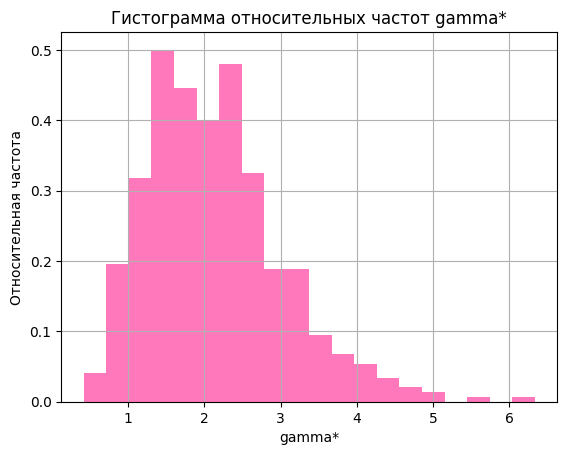

In [58]:
plt.hist(gamma_star_values, bins=20, density=True, alpha=0.9, color='hotpink')
plt.title('Гистограмма относительных частот gamma*')
plt.xlabel('gamma*')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.show()

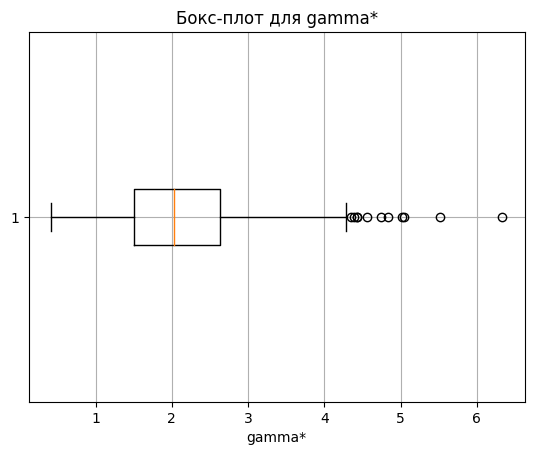

In [59]:
plt.boxplot(gamma_star_values, vert=False)
plt.title('Бокс-плот для gamma*')
plt.xlabel('gamma*')
plt.grid()
plt.show()

In [60]:
# M = 1800
# n = 14
# k = 4

# alpha = 1 - gamma
# chi2_lower = chi2.ppf(alpha / 2, df=5-1)
# chi2_upper = chi2.ppf(1 - alpha / 2, df=5-1)
# confidence_intervals = []
# count_in_interval = 0
# for i in range(M): 
#     U_samples = np.random.chisquare(df=4, size=5) 
#     W = np.mean(U_samples)/5
#     S2_W = np.var(U_samples, ddof=1)  
#     lower_bound = (5 - 1) * S2_W / chi2_upper
#     upper_bound = (5 - 1) * S2_W / chi2_lower

#     if lower_bound <= S2_W <= upper_bound: 
#         count_in_interval += 1

#     confidence_intervals.append((lower_bound, upper_bound))

# confidence_intervals = np.array(confidence_intervals)
 
# # gamma_star = count_in_interval / M
# gamma_star = np.mean((confidence_intervals[:, 0] <= np.var(U_samples, ddof=1)) & (confidence_intervals[:, 1] >= np.var(U_samples, ddof=1)))

# print(f"Оценка надежности gamma*: {gamma_star}")
# print(f"Исходная надежность gamma: {gamma}")
# print(f"Отклонение: {abs(gamma_star - gamma)}")

In [61]:
# K = 100
# count_in_interval = 0
# gamma_stars = []
# alpha = 1 - gamma
# chi2_lower = chi2.ppf(alpha / 2, df=5-1)
# chi2_upper = chi2.ppf(1 - alpha / 2, df=5-1)
# for _ in range (K):
#     confidence_intervals=[]
#     for i in range(M):
#         U = np.random.chisquare(df=4, size=5) 
#         W = np.mean(U) / 5  
#         S2 = np.var(U, ddof=1)   
#         lower_bound = (5 - 1) * S2 / chi2_lower
#         upper_bound = (5 - 1) * S2 / chi2_upper
#         confidence_intervals.append((lower_bound, upper_bound))
#     true_variance = np.var(np.random.chisquare(df=4, size=5), ddof=1) / 25  # Дисперсия W
#     gamma_star = np.mean([lower <= true_variance <= upper for lower, upper in confidence_intervals])
#     gamma_stars.append(gamma_star)

# # Преобразуем в массив для удобства
# gamma_stars = np.array(gamma_stars)

# # Шаг 5: Выборочные числовые характеристики
# mean_gamma_star = np.mean(gamma_stars)
# std_gamma_star = np.std(gamma_stars)
# median_gamma_star = np.median(gamma_stars)

# # Вывод результатов
# print(f"Среднее значение gamma*: {mean_gamma_star}")
# print(f"Стандартное отклонение gamma*: {std_gamma_star}")
# print(f"Медиана gamma*: {median_gamma_star}")

# print(f"Оценка надежности gamma*: {gamma_star}")
# print(f"Массив из K значений gamma*: ")
# print(f"{gamma_stars}") 

In [62]:
# plt.hist(gamma_stars, bins=20, density=True, alpha=0.9, color='hotpink')
# plt.title('Гистограмма относительных частот gamma*')
# plt.xlabel('gamma*')
# plt.ylabel('Относительная частота')
# plt.grid(True)
# plt.show()

In [63]:
# plt.boxplot(gamma_stars, vert=False)
# plt.title('Бокс-плот для gamma*')
# plt.xlabel('gamma*')
# plt.grid()
# plt.show()